In [2]:
import numpy as np
from numpy.linalg import inv
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

# data monthly wage

In [3]:
data_wage = pd.read_csv("../data/monthly-wage.csv", sep=";")

In [4]:
data_wage.head()

,Month,Real wage
0,1993-01,100.00
1,1993-02,99.04
2,1993-03,101.77
3,1993-04,110.05
4,1993-05,115.47


In [5]:
data_wage.Month = data_wage.Month.apply(lambda x: datetime.strptime(x, "%Y-%m"))

In [6]:
import time

/home/yeva/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


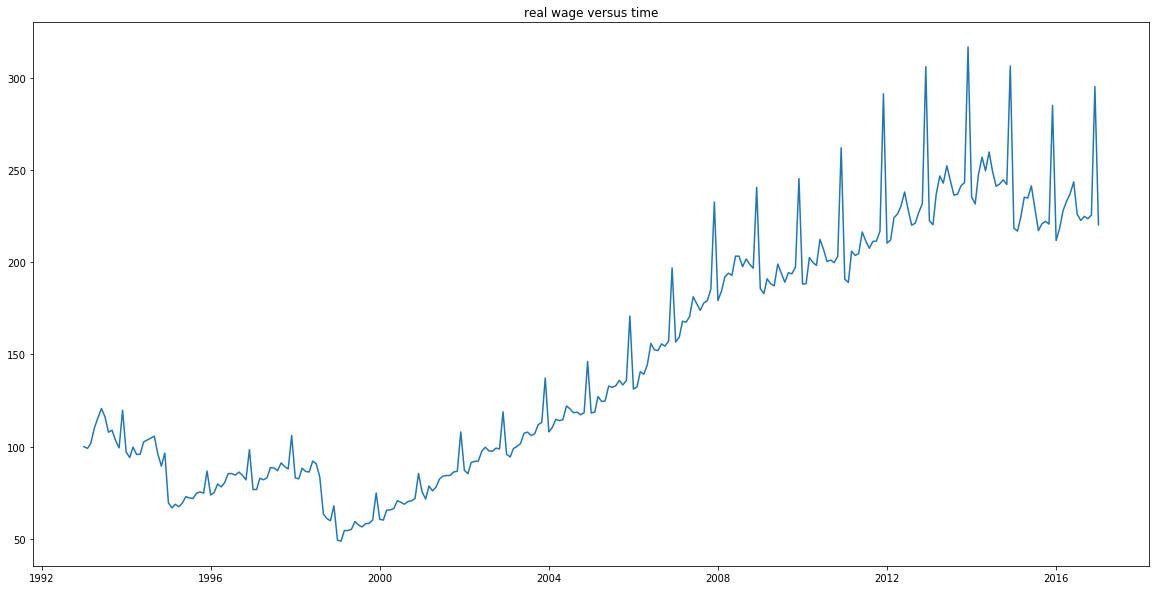

In [7]:
plt.title("real wage versus time")
plt.plot(data_wage.Month, data_wage["Real wage"]);

In [8]:
class time_series_regression:
    def __init__(self, window, step=1):
        self.window  = window
        self.step = step
        self.weights = np.array([])
        self.point = np.array([])
    
    def regresion(self, features, targets):
        weights = ((inv((features.T).dot(features))).dot(
            features.T)).dot(targets)
        return weights
    
    def train(self, data):
        t = len(data) - self.step
        feature_matrix = []
        targets = []
        for i in range(self.window, t+1):
            datum = np.array([data[k] for k in range(i-self.window, i)])
            feature_matrix.append(datum)
            targets.append(data[i-1 + self.step])
        targets = np.array(targets)
        targets = targets.reshape((-1, 1))
        self.weights = self.regresion(np.array(feature_matrix), targets)
        self.point = data[(len(data)-self.window):]
        
    def predict(self):
        return ((self.weights).flatten()).dot(self.point)
        
    
    

In [9]:
data = np.array(data_wage["Real wage"])

In [10]:
model = time_series_regression(100, step=20)

In [11]:
model.train(data)

In [12]:
model.predict()

294.6517231535063